In [10]:
import pandas as pd

In [12]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [14]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [16]:
import seaborn as sbn
import matplotlib.pyplot as plt

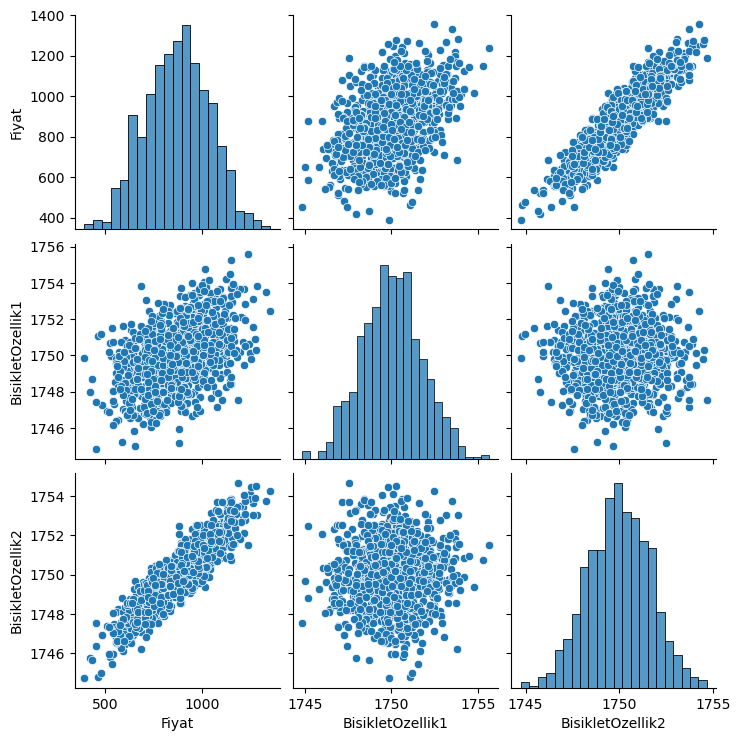

In [17]:
sbn.pairplot(dataFrame)

## Veriyi Test/Train olarak Ayırma

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
#train_test_split

In [25]:
#y gitmek istediğimiz değer (fiyat)
# y = wx + b
# y -> label
# x -> features
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)


In [27]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [29]:
x_train.shape

(670, 2)

In [31]:
x_test.shape

(330, 2)

In [33]:
y_test.shape

(330,)

In [35]:
y_train.shape

(670,)

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(x_train)

MinMaxScaler()

In [44]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [48]:
import tensorflow as tf

In [54]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1)) #nörön

model.compile(optimizer = "rmsprop", loss = "mse")

In [58]:
#neyi eğiticez? x_train hangisiyle eğiticez ? y_train
model.fit(x_train, y_train, epochs=250) 

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 799824.5000
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 794316.7500
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 790248.3125
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 790560.2500
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 792284.7500
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 804752.3125
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 792168.6250
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 803549.7500
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 775184.1875
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 782493.5000
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 784729.1250
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 782706.0000
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 772016.5000
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 327u

In [68]:
loss=model.history.history["loss"]

<Axes: >

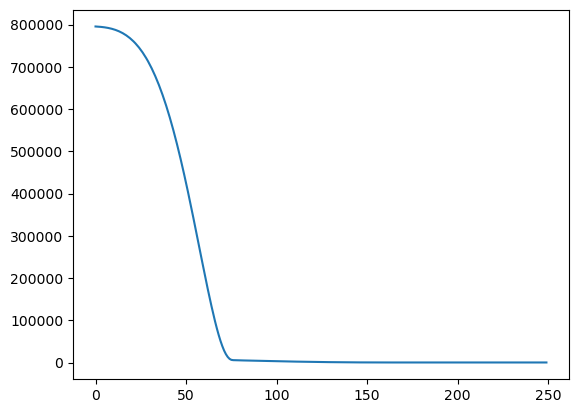

In [70]:
sbn.lineplot(x=range(len(loss)),y =loss)

In [76]:
trainLoss = model.evaluate(x_train,y_train,verbose = 0)

In [78]:
trainLoss

73.22809600830078

In [80]:
testLoss = model.evaluate(x_test,y_test,verbose = 0)

In [84]:
testLoss

75.43319702148438

In [86]:
testTahminleri = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [88]:
testTahminleri

array([[1078.3605 ],
       [ 623.87476],
       [ 876.44495],
       [ 894.5644 ],
       [ 899.8287 ],
       [ 451.3622 ],
       [ 931.52875],
       [ 991.88654],
       [ 941.61584],
       [1017.26917],
       [ 751.13055],
       [ 918.2564 ],
       [ 947.90424],
       [1055.2383 ],
       [1122.0813 ],
       [ 681.67645],
       [1127.5819 ],
       [ 650.9997 ],
       [1155.2369 ],
       [ 886.88605],
       [ 893.16547],
       [ 716.94293],
       [ 456.73676],
       [ 612.04706],
       [ 835.2946 ],
       [1091.792  ],
       [ 713.925  ],
       [ 757.0802 ],
       [ 873.7944 ],
       [ 770.8306 ],
       [ 451.1268 ],
       [ 783.2915 ],
       [ 728.4477 ],
       [ 646.8781 ],
       [ 887.07   ],
       [ 844.09296],
       [1036.2521 ],
       [1023.2973 ],
       [ 845.22845],
       [ 862.53204],
       [ 757.34247],
       [1175.255  ],
       [1098.2    ],
       [1088.3981 ],
       [ 873.5088 ],
       [ 596.64087],
       [1146.3844 ],
       [ 973.

In [90]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y rakamaları"])

In [96]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [98]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [100]:
tahminDf

,Gerçek Y rakamaları,0
0,1081.652164,1078.360474
1,622.675990,623.874756
2,889.356810,876.444946
3,902.826733,894.564392
4,897.662404,899.828674
...,...,...
325,1028.438035,1014.052002
326,789.934950,791.038940
327,758.490486,766.175842
328,1172.871659,1168.263916


In [102]:
tahminDf.columns = ["Gerçek Y","Tahmin Y"]

In [104]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1078.360474
1,622.675990,623.874756
2,889.356810,876.444946
3,902.826733,894.564392
4,897.662404,899.828674
...,...,...
325,1028.438035,1014.052002
326,789.934950,791.038940
327,758.490486,766.175842
328,1172.871659,1168.263916


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

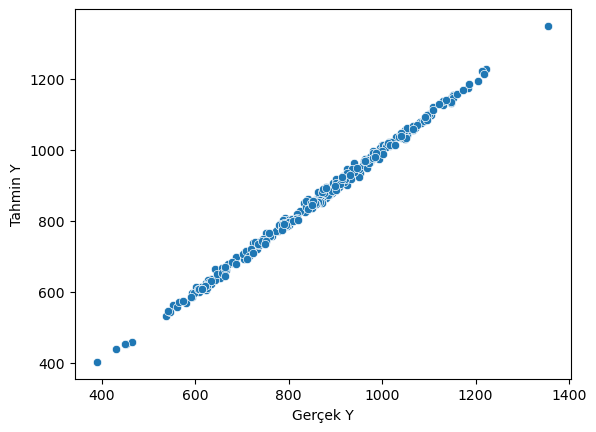

In [106]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data=tahminDf )

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

6.953882977947441

In [119]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

75.43320071336672

In [123]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [125]:
yeniBisikletOzellikleri = [[1760,1758]]

In [127]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [129]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[1985.4103]], dtype=float32)

In [133]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("bisiklet_modeli.h5")

In [ ]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5")

In [ ]:
sonradanCagırılanModel.predict(yeniBisikletOzellikleri)